In [79]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

tensor = torch.load(f"./../final_embeddings/ankh_merged_tensor.pt", map_location=torch.device('cpu'))

In [57]:
def estimate_intrinsic_dimension(data, nn=3, plot=True):
    knn = NearestNeighbors(n_neighbors=nn).fit(data)
    distances, _ = knn.kneighbors(data)

    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]

    ratios = r2 / r1
    
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    cdf = np.arange(1, len(sorted_ratios) + 1) / len(sorted_ratios)
    
    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(np.log(sorted_ratios), np.log(cdf), 'o-', label='Log-Log CDF')
        plt.xlabel('log(R)')
        plt.ylabel('log(CDF)')
        plt.title('2NN Method: Intrinsic Dimension Estimation')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    # Estimate slope (linear region)
    linear_region = slice(len(sorted_ratios) // 4, 3 * len(sorted_ratios) // 4)  # Adjust as needed
    log_ratios = np.log(sorted_ratios[linear_region])
    log_cdf = np.log(cdf[linear_region])
    
    slope, _ = np.polyfit(log_ratios, log_cdf, 1)
    
    return slope



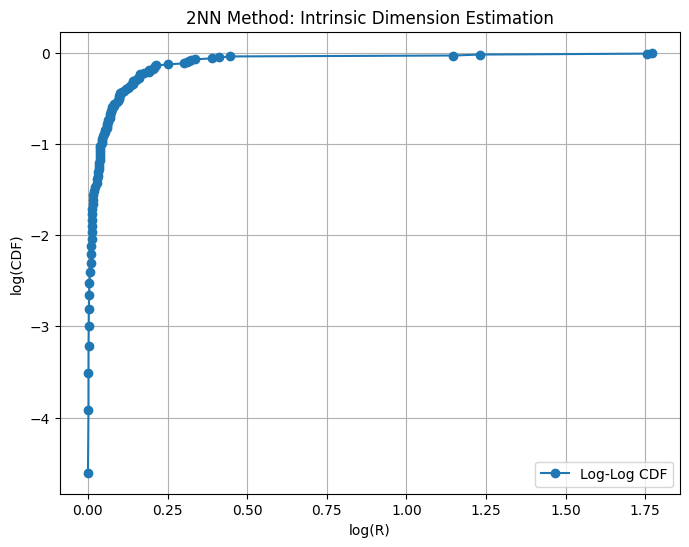

7.897177057159072

In [58]:
estimate_intrinsic_dimension(tensor[:100, 10, :])

In [59]:
# data = tensor[:, 0, :]

def plot(data):
    knn = NearestNeighbors(n_neighbors=3).fit(data)
    distances, _ = knn.kneighbors(data)
    
    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]
    
    ratios = r2 / r1
    
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    # cleaned_sorted_rations = sorted_ratios[~np.isnan(sorted_ratios) & ~np.isinf(sorted_ratios)]
    # Q1 = np.percentile(cleaned_sorted_rations, 25)
    # Q3 = np.percentile(cleaned_sorted_rations, 75)
    # 
    # # Calculate the IQR
    # IQR = Q3 - Q1
    # 
    # # Define the bounds for outliers
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    # 
    # # Remove outliers
    # cleaned_no_outlier_sorted_rations = cleaned_sorted_rations[(cleaned_sorted_rations >= lower_bound) & (cleaned_sorted_rations <= upper_bound)]
    
    
    cumulative_sum = np.cumsum(sorted_ratios)
    
    # Step 3: Normalize to get the cumulative distribution
    cumulative_distribution = cumulative_sum / cumulative_sum[-1]
    
    x_axis = np.log(sorted_ratios)
    y_axis = -np.log(1 - cumulative_distribution)
    
    plt.plot(x_axis, y_axis)
    plt.xlabel('Value')
    plt.ylabel('Cumulative Distribution')
    plt.title('Cumulative Distribution')
    plt.show()



In [60]:
plot(tensor[:, 0, :])

KeyboardInterrupt: 

In [ ]:
data = tensor[:, 0, :]




In [75]:

def no_outlier_plot(data, title):

    knn = NearestNeighbors(n_neighbors=3).fit(data)
    distances, _ = knn.kneighbors(data)
    
    r1 = distances[:, 1]  # First nearest neighbor
    r2 = distances[:, 2]
    
    ratios = r2 / r1
    # Log-log cumulative density function (CDF)
    sorted_ratios = np.sort(ratios)
    cleaned_sorted_rations = sorted_ratios[~np.isnan(sorted_ratios) & ~np.isinf(sorted_ratios)]
    Q1 = np.percentile(cleaned_sorted_rations, 25)
    Q3 = np.percentile(cleaned_sorted_rations, 75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    cleaned_no_outlier_sorted_rations = cleaned_sorted_rations[(cleaned_sorted_rations >= lower_bound) & (cleaned_sorted_rations <= upper_bound)]
    
    
    cumulative_sum = np.cumsum(cleaned_no_outlier_sorted_rations)
    
    # Step 3: Normalize to get the cumulative distribution
    cumulative_distribution = cumulative_sum / cumulative_sum[-1]
    
    x_axis = np.log(cleaned_no_outlier_sorted_rations)
    y_axis = -np.log(1 - cumulative_distribution)

    
    plt.plot(x_axis, y_axis)
    plt.xlabel('log(mu)')
    plt.ylabel('-log(1 - F)')
    plt.title(title)
    plt.show()


/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


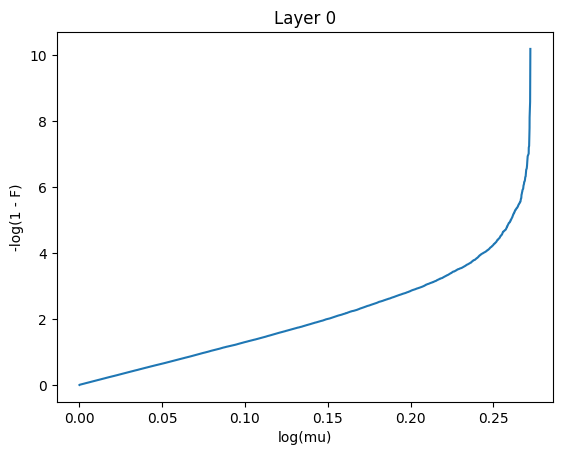

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


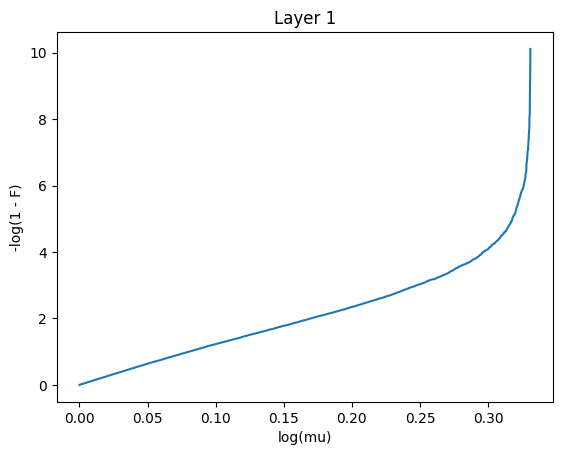

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


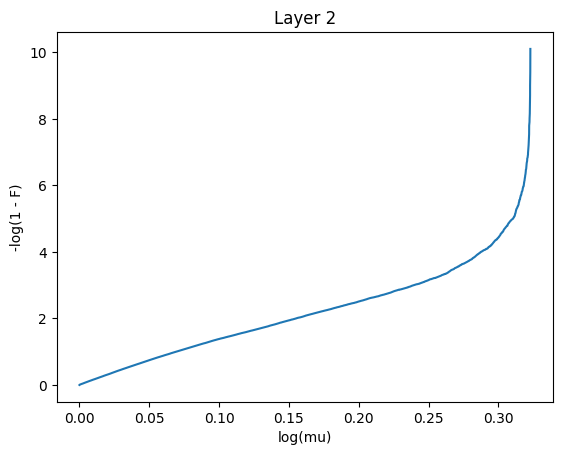

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


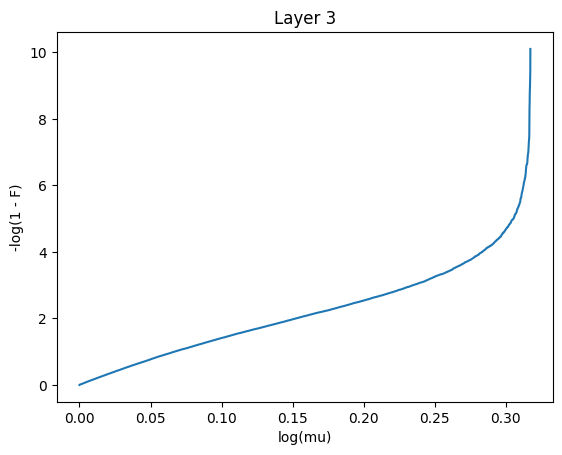

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


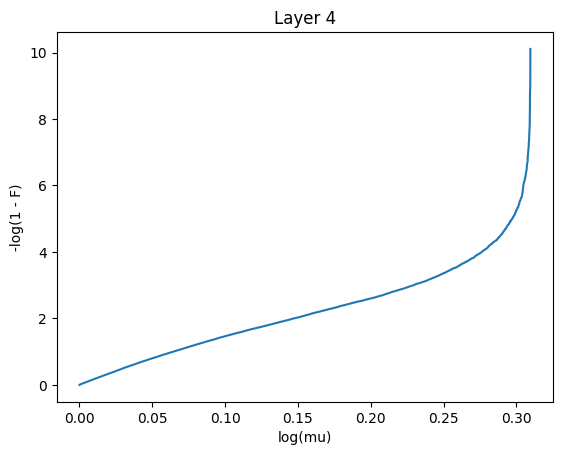

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


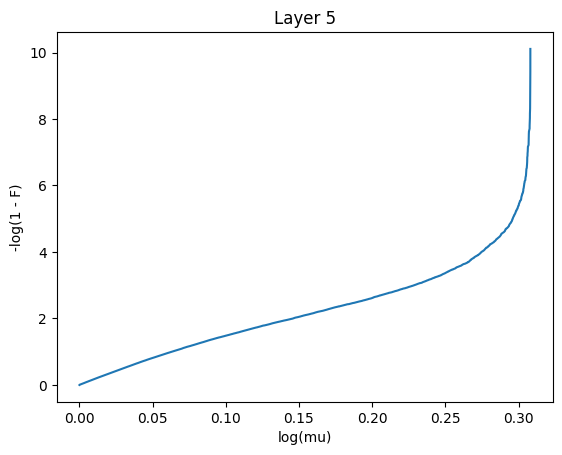

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


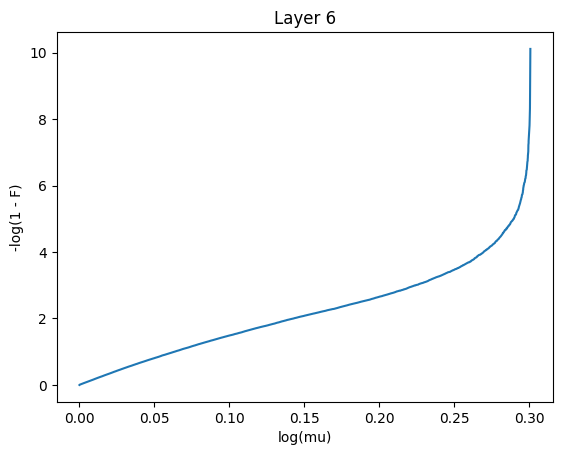

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


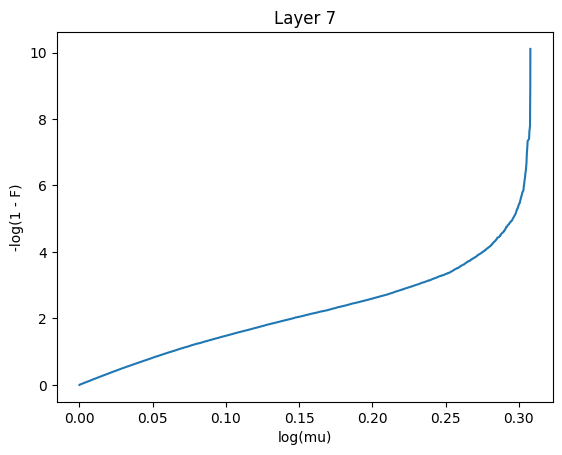

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


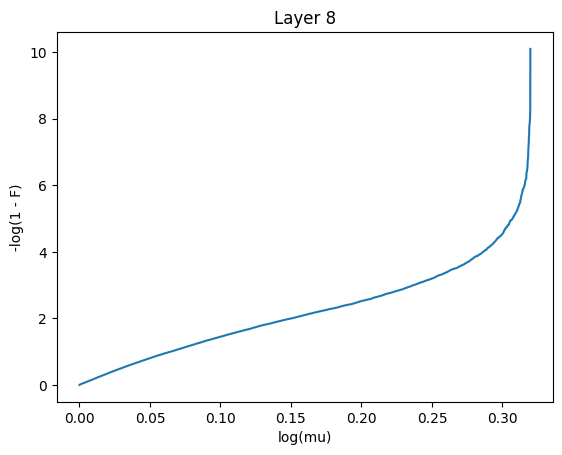

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


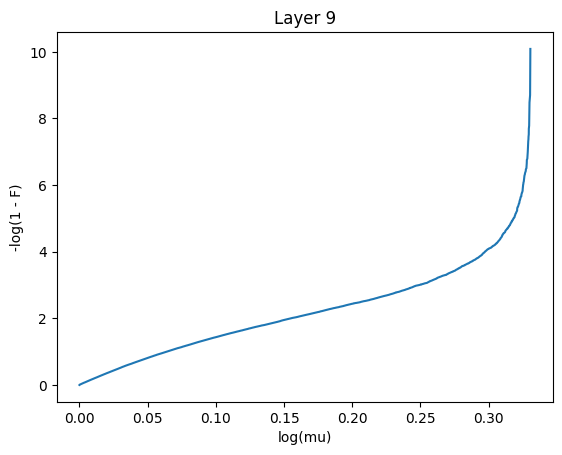

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


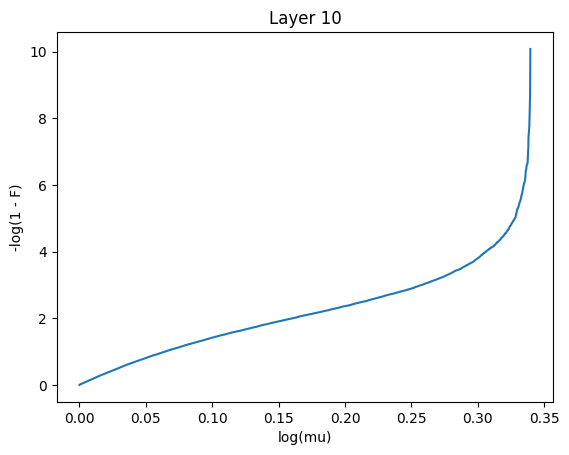

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


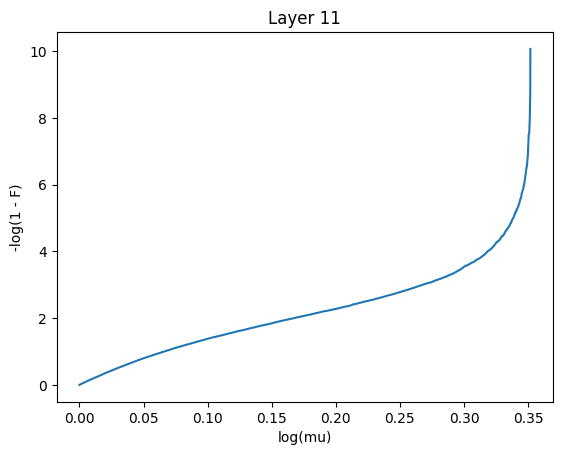

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


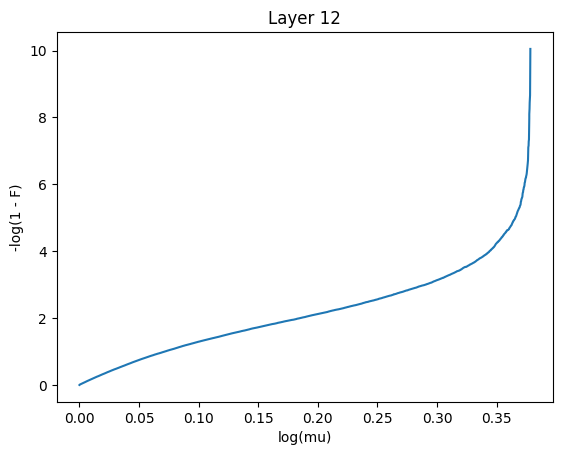

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


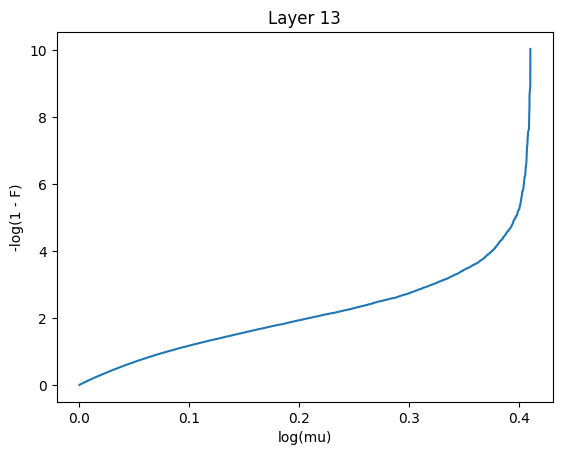

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


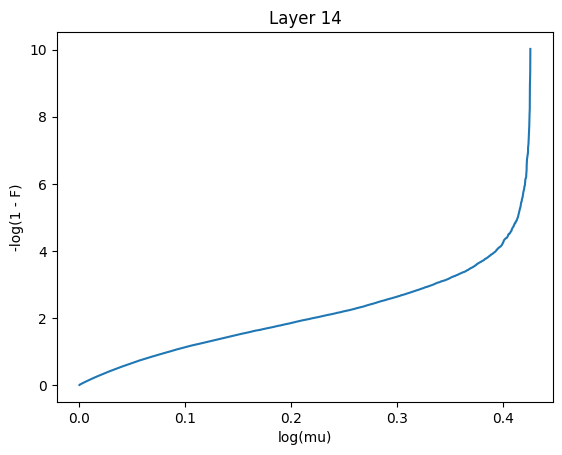

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


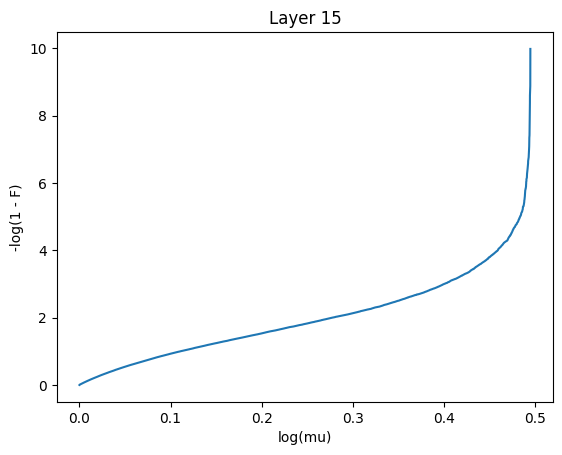

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


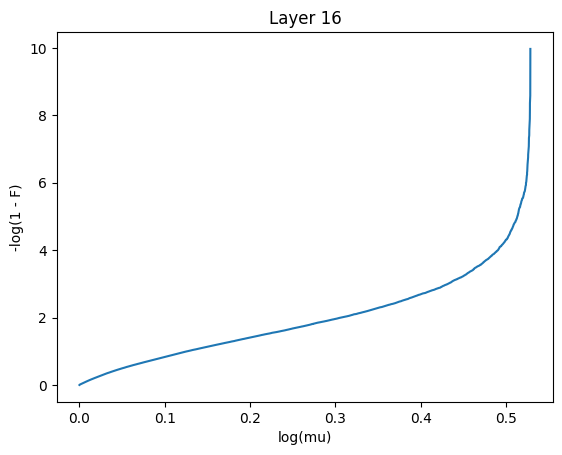

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


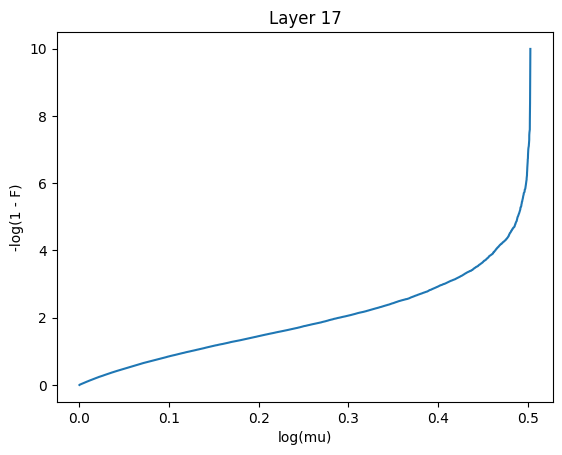

KeyboardInterrupt: 

In [68]:
for i in range(tensor.shape[1]):
    no_outlier_plot(tensor[:, i, :], f"Layer{i}")

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


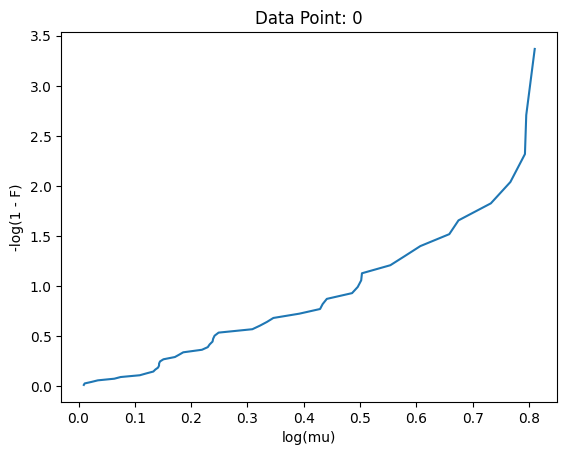

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


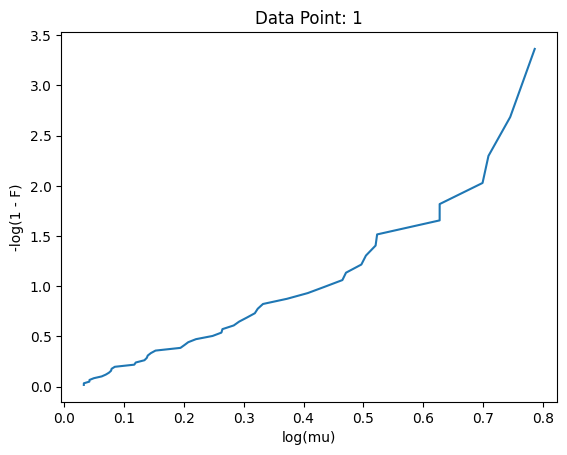

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


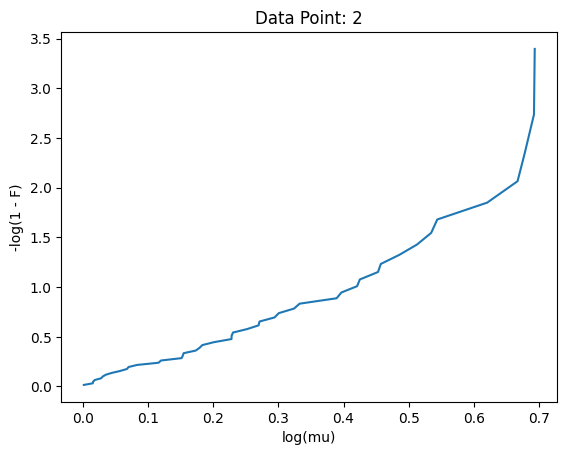

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


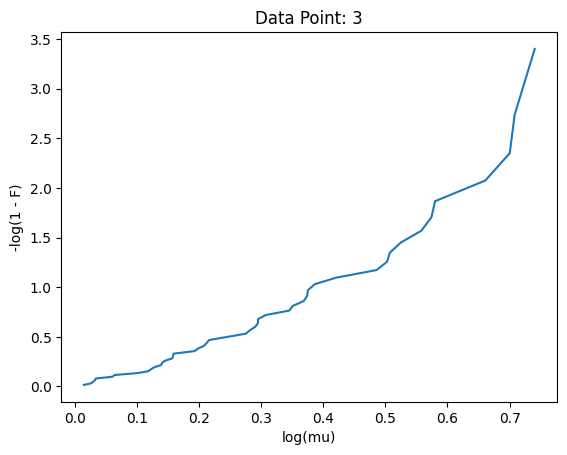

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


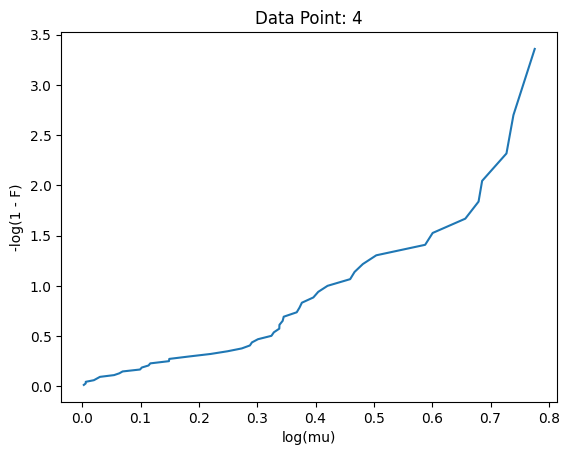

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


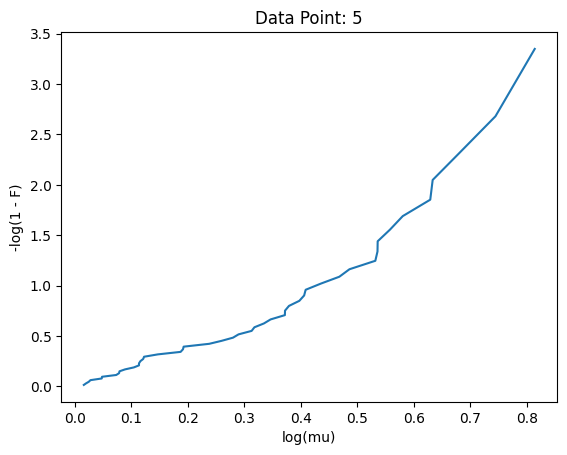

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


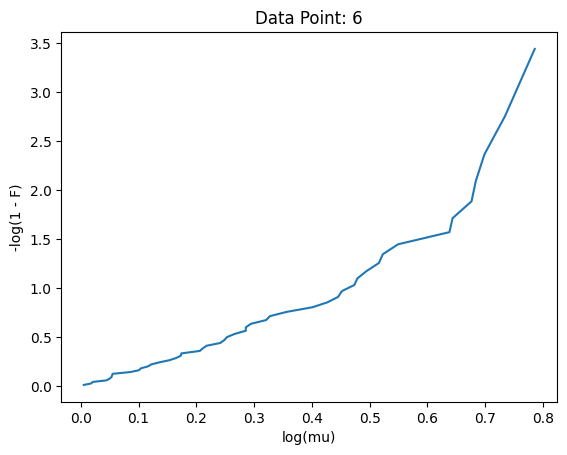

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


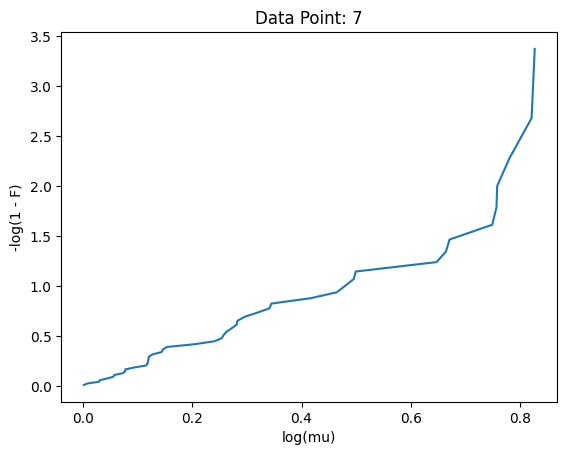

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


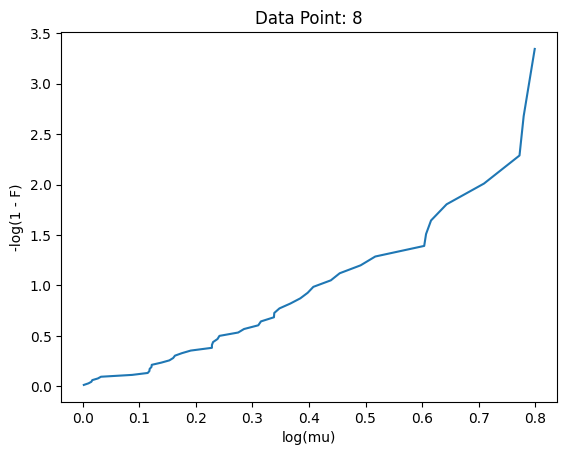

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


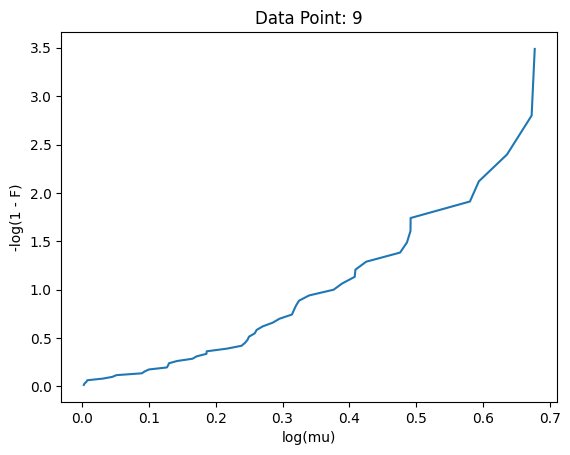

In [80]:
for i in range(0, 10):
    no_outlier_plot(tensor[i, :, :], f"Data Point: {i}")

In [70]:
tensor = torch.load(f"./../final_embeddings/protgpt2_merged_tensor.pt", map_location=torch.device('cpu'))

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


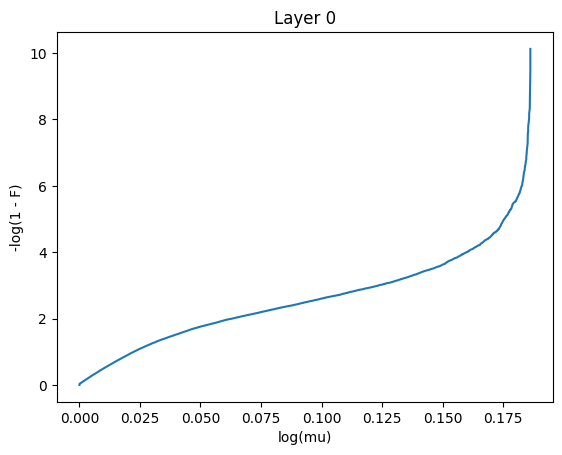

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


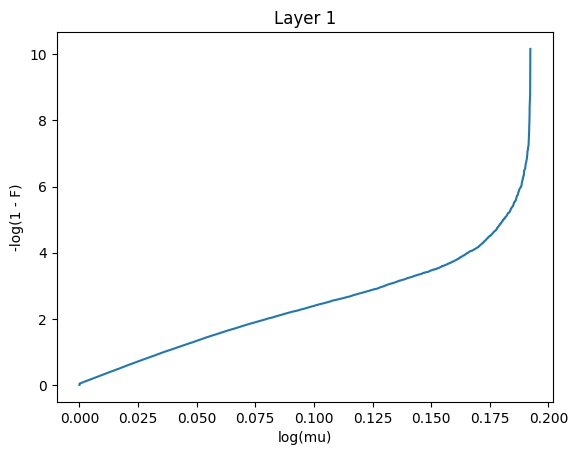

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


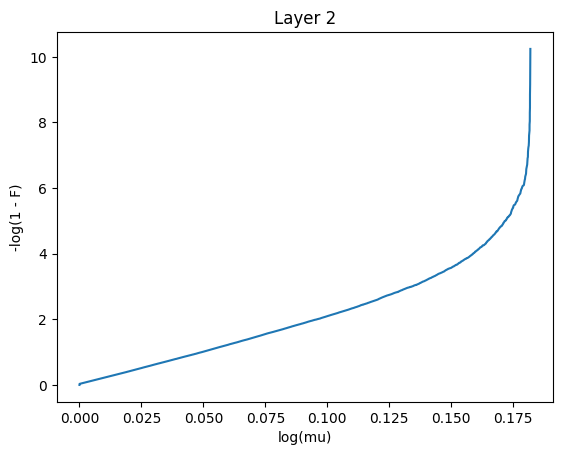

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


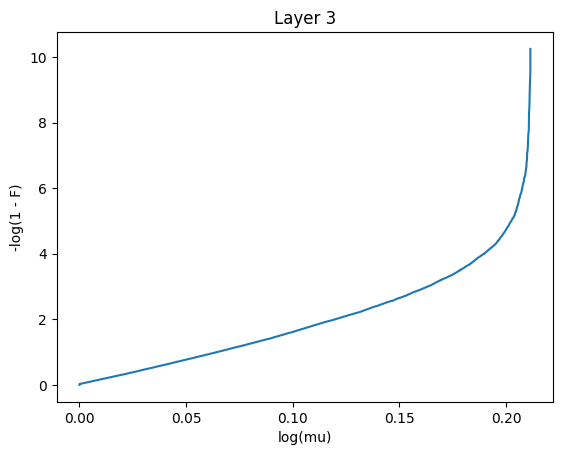

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


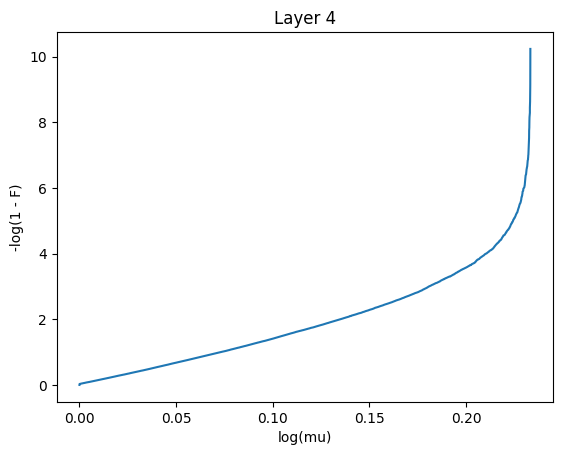

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


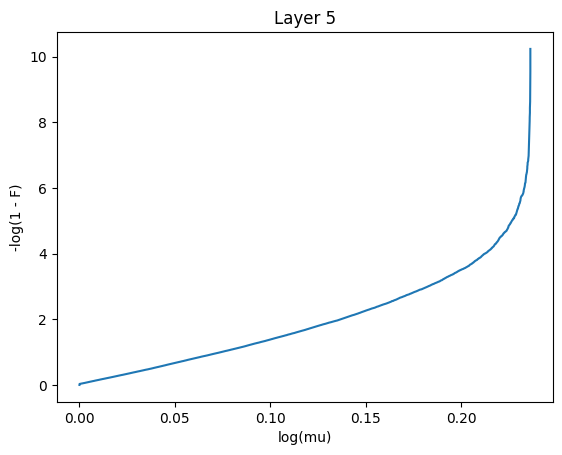

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


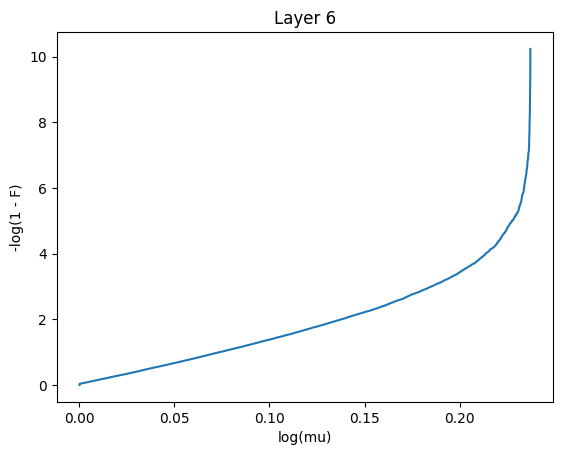

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


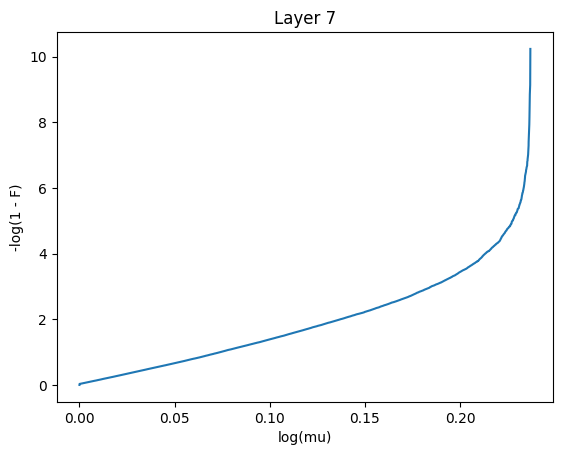

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


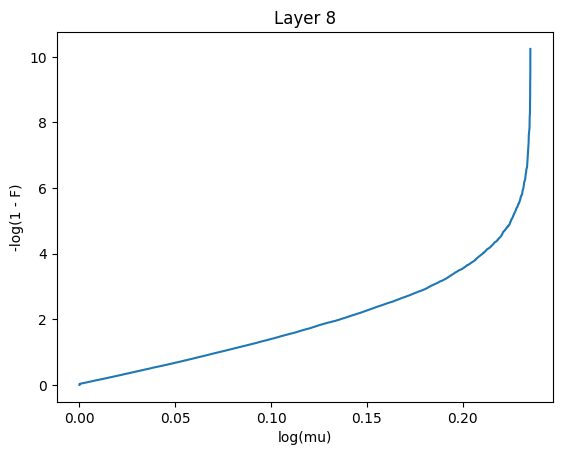

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


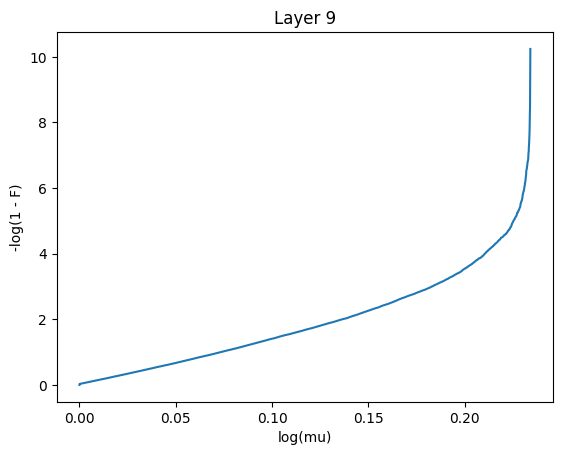

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


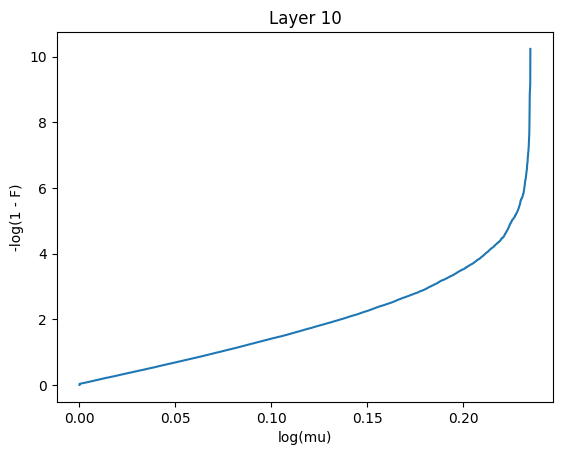

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


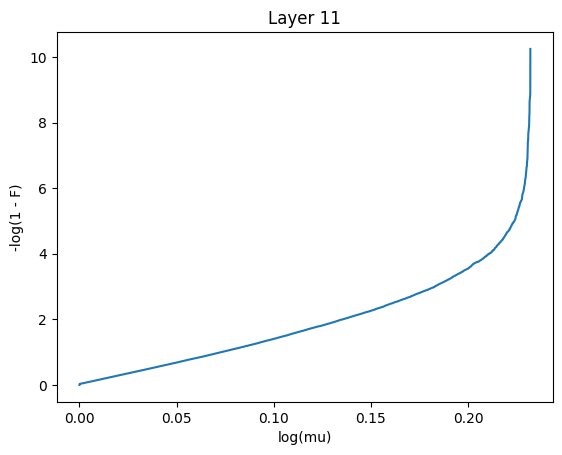

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


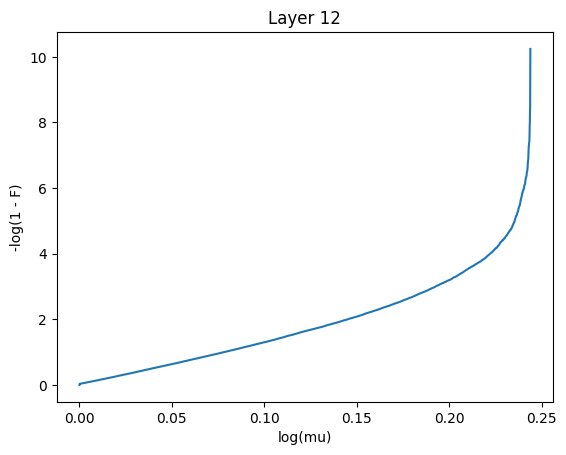

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


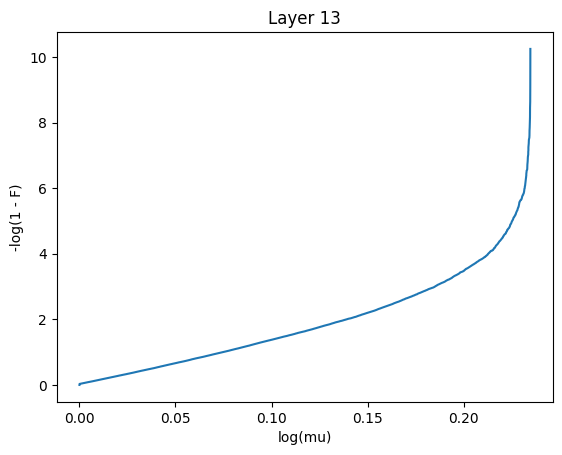

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


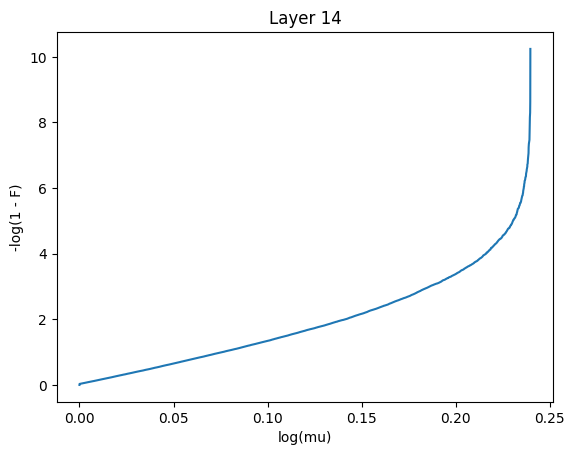

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


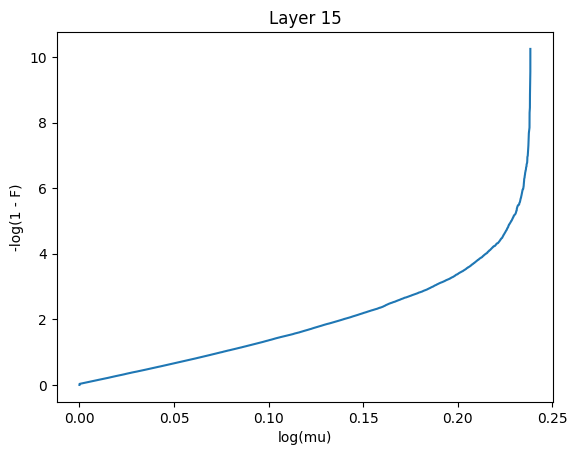

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


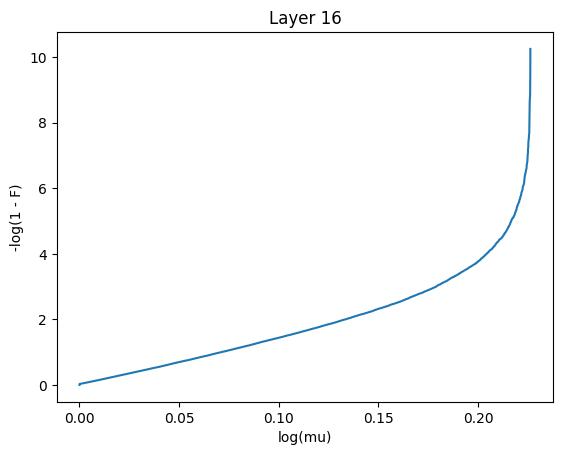

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


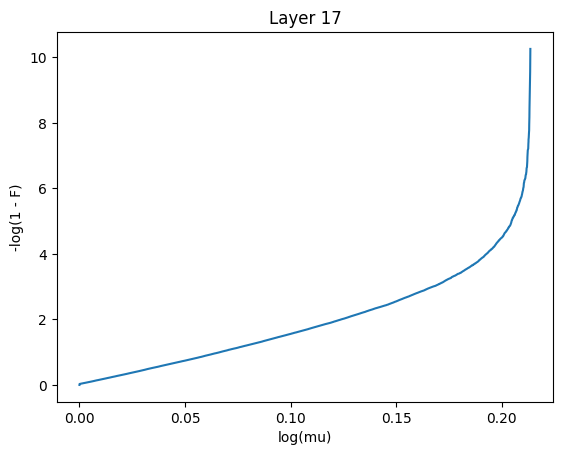

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


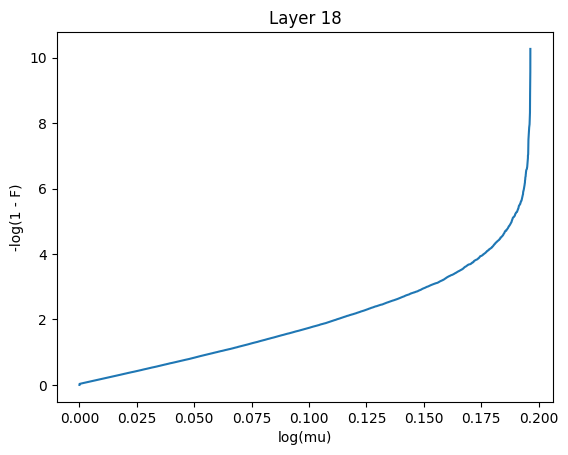

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: divide by zero encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:9: RuntimeWarning: invalid value encountered in divide
  ratios = r2 / r1
/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/523748972.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


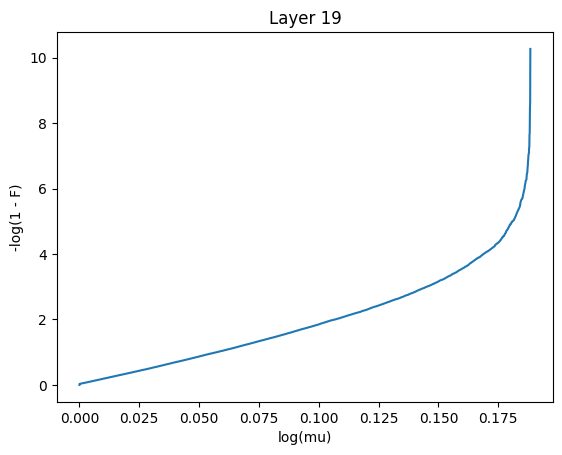

KeyboardInterrupt: 

In [71]:
for i in range(tensor.shape[1]):
    no_outlier_plot(tensor[:, i, :], f"Layer{i}")

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


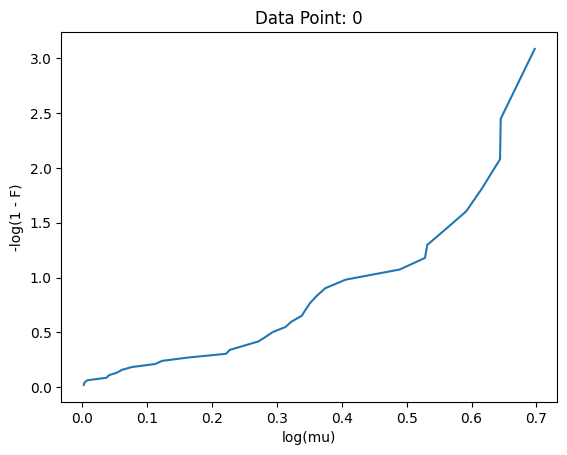

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


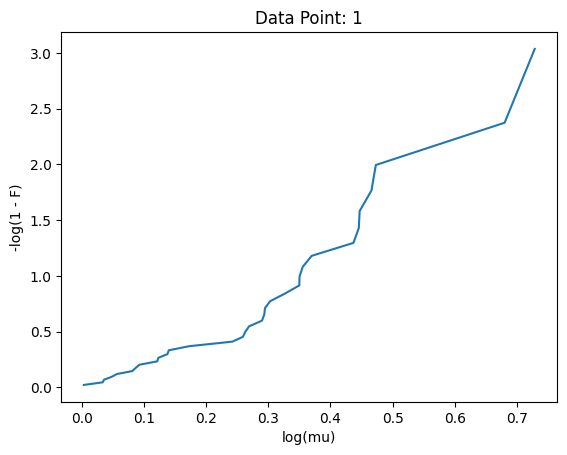

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


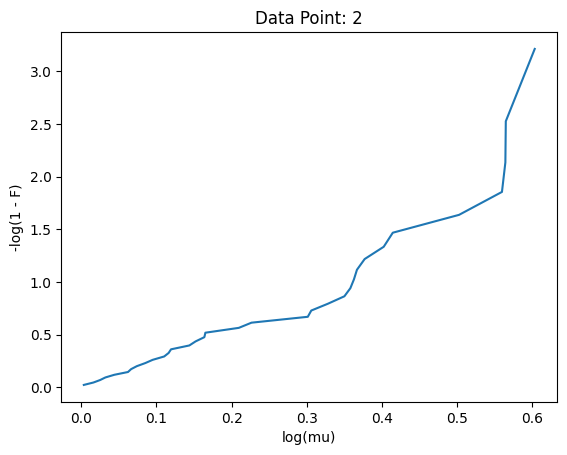

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


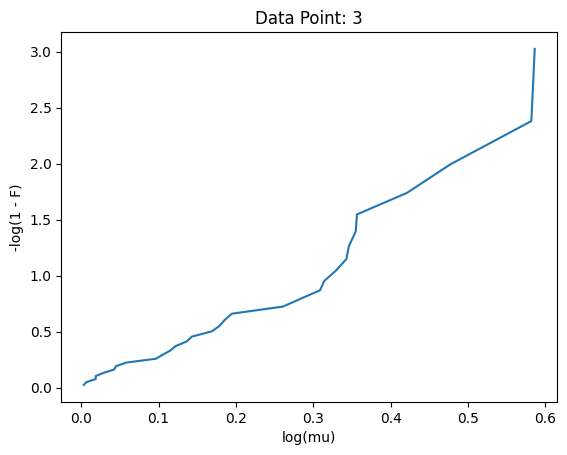

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


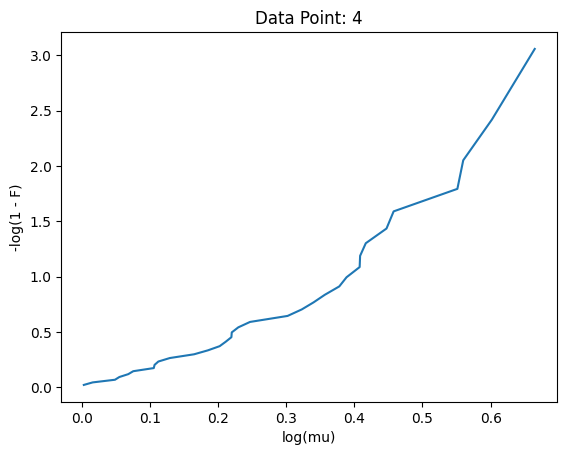

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


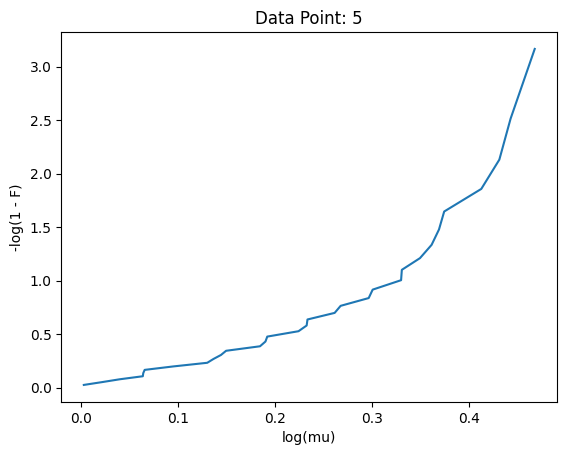

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


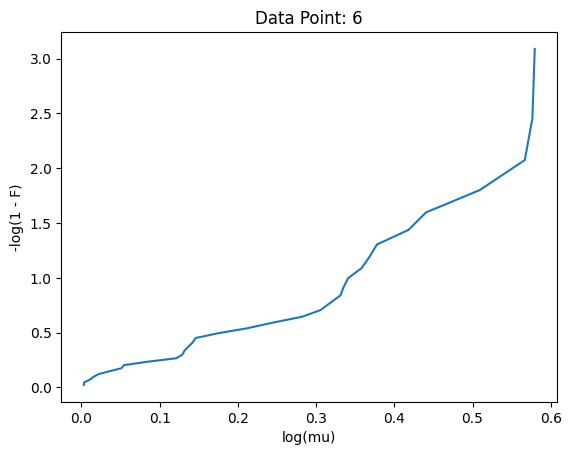

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


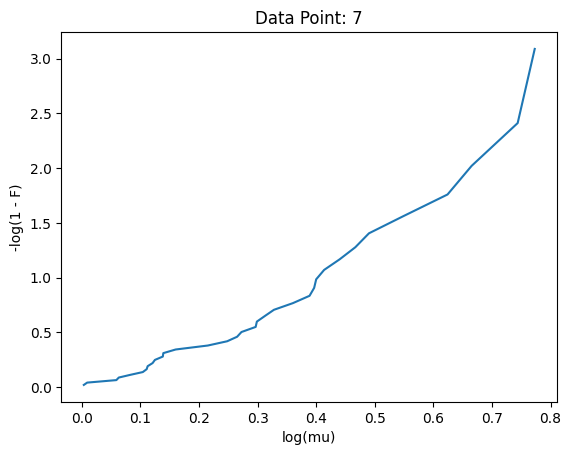

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


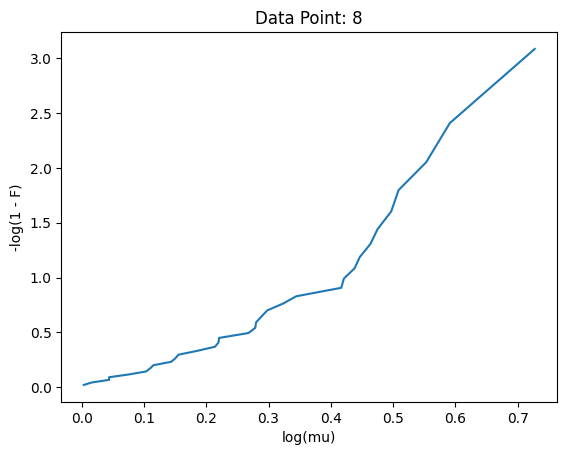

/var/folders/k5/vfkgn6fn7kb0dldcfhg4dcqm0000gn/T/ipykernel_10879/1381243570.py:33: RuntimeWarning: divide by zero encountered in log
  y_axis = -np.log(1 - cumulative_distribution)


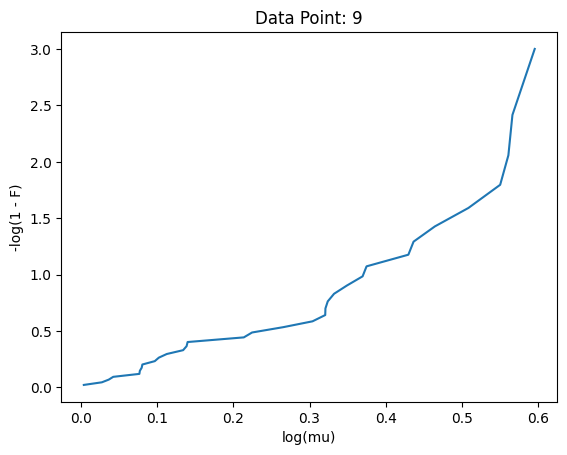

In [78]:
for i in range(0, 10):
    no_outlier_plot(tensor[i, :, :], f"Data Point: {i}")